# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Reading Data

In [ ]:
project_data = pd.read_csv('/content/drive/My Drive/Donor Choose/Assignment_EDA.csv')
#resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 22)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'Unnamed: 0.1' 'id' 'teacher_id' 'teacher_prefix'
 'school_state' 'project_submitted_datetime' 'project_grade_category'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'clean_categories' 'clean_subcategories' 'essay' 'price' 'quantity'
 'IsNumerical']


In [ ]:
project_data.head(2)

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,IsNumerical
0,0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0
1,1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0


# 2. Preprocessing Categorical Features: project_grade_category

In [ ]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

# 3. Preprocessing Categorical Features: project_subject_categories

In [ ]:
project_data['clean_categories'].value_counts()

Literacy_Language                       23655
Math_Science                            17072
Literacy_Language Math_Science          14636
Health_Sports                           10177
Music_Arts                               5180
SpecialNeeds                             4226
Literacy_Language SpecialNeeds           3961
AppliedLearning                          3771
Math_Science Literacy_Language           2289
AppliedLearning Literacy_Language        2191
History_Civics                           1851
Math_Science SpecialNeeds                1840
Literacy_Language Music_Arts             1757
Math_Science Music_Arts                  1642
AppliedLearning SpecialNeeds             1467
History_Civics Literacy_Language         1421
Health_Sports SpecialNeeds               1391
Warmth Care_Hunger                       1309
Math_Science AppliedLearning             1220
AppliedLearning Math_Science             1052
Literacy_Language History_Civics          809
Health_Sports Literacy_Language   

>remove spaces, 'the' <br>
replace '&' with '\_', and ',' with '_'

In [ ]:
project_data['clean_categories'] = project_data['clean_categories'].str.replace(' The ','_')
project_data['clean_categories'] = project_data['clean_categories'].str.replace(' ','_')
project_data['clean_categories'] = project_data['clean_categories'].str.replace('&','_')
project_data['clean_categories'] = project_data['clean_categories'].str.replace(',','_')
project_data['clean_categories'] = project_data['clean_categories'].str.lower()
project_data['clean_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

# 4. Preprocessing Categorical Features: teacher_prefix

In [ ]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [ ]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


>numebr of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [ ]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [ ]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [ ]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# 5. Preprocessing Categorical Features: project_subject_subcategories

In [ ]:
project_data['clean_subcategories'].value_counts()

Literacy                              9486
Literacy Mathematics                  8325
Literature_Writing Mathematics        5923
Literacy Literature_Writing           5571
Mathematics                           5379
                                      ... 
Economics ForeignLanguages               1
FinancialLiteracy ForeignLanguages       1
Gym_Fitness SocialSciences               1
Economics NutritionEducation             1
Gym_Fitness Warmth Care_Hunger           1
Name: clean_subcategories, Length: 401, dtype: int64

> same process we did in project_subject_categories

In [ ]:
project_data['clean_subcategories'] = project_data['clean_subcategories'].str.replace(' The ','_')
project_data['clean_subcategories'] = project_data['clean_subcategories'].str.replace(' ','_')
project_data['clean_subcategories'] = project_data['clean_subcategories'].str.replace('&','_')
project_data['clean_subcategories'] = project_data['clean_subcategories'].str.replace(',','_')
project_data['clean_subcategories'] = project_data['clean_subcategories'].str.lower()
project_data['clean_subcategories'].value_counts()

literacy                                 9486
literacy_mathematics                     8325
literature_writing_mathematics           5923
literacy_literature_writing              5571
mathematics                              5379
                                         ... 
economics_music                             1
gym_fitness_warmth_care_hunger              1
literature_writing_nutritioneducation       1
extracurricular_financialliteracy           1
financialliteracy_foreignlanguages          1
Name: clean_subcategories, Length: 401, dtype: int64

# 6. Preprocessing Categorical Features: school_state

In [ ]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

>convert all of them into small letters

In [ ]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

# 7. Preprocessing Categorical Features: project_title

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [ ]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [ ]:
# Combining all the above
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [ ]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 48251.61it/s]


In [ ]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# 8. Preprocessing Categorical Features: essay

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [ ]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [00:49<00:00, 2187.16it/s]


In [ ]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

# 8. Preprocessing Numerical Values: price

In [ ]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

## 8.1 applying StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [ ]:
project_data['std_price'].head()

0   -0.390533
1    0.002396
2    0.595191
3   -0.177469
4   -0.626236
Name: std_price, dtype: float64

## 8.2 applying MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [ ]:
project_data['nrm_price'].head()

0    0.015397
1    0.029839
2    0.051628
3    0.023228
4    0.006733
Name: nrm_price, dtype: float64

In [ ]:
project_data.head(2)

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,IsNumerical,std_price,nrm_price
0,0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,literacy_language,esl_literacy,My students are English learners that are work...,154.6,23,0,-0.390533,0.015397
1,1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,history_civics_health_sports,civics_government_teamsports,Our students arrive to our school eager to lea...,299.0,1,0,0.002396,0.029839


In [ ]:
check_val = []
for i in tqdm(project_data['project_resource_summary']):
    sent = decontracted(i)
    sent = ' '.join(w for w in sent.split() if w.isdigit())
    l = len(sent)
    check_val.append(l)

project_data["IsNumerical"] = check_val

100%|██████████| 109248/109248 [00:01<00:00, 98060.72it/s]


In [ ]:
project_data_1 = project_data.drop(['Unnamed: 0', 'id', 'teacher_id', 'project_submitted_datetime', 'project_title',
                                    'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4',
                                    'project_resource_summary',	'std_price',	'nrm_price','Unnamed: 0.1'], axis = 1)

In [ ]:
print("Columns in project_data_1 after removing unnecessary columns\n")
print('Shape of Final DataFrame : ',project_data_1.shape)
print('\n')
print('Columns : ',project_data_1.columns)

Columns in project_data_1 after removing unnecessary columns

Shape of Final DataFrame :  (109248, 11)


Columns :  Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'IsNumerical'],
      dtype='object')


In [ ]:
project_data_1.to_csv('/content/drive/My Drive/Donor Choose/Assignment_PreprocessedData.csv')

### MODEL 1

In [3]:
project_data_1 = pd.read_csv('/content/drive/My Drive/Donor Choose/Assignment_PreprocessedData.csv')

In [8]:
X = project_data_1.drop(['project_is_approved'],axis = 1)
Y = project_data_1['project_is_approved']

In [ ]:
from sklearn.model_selection import train_test_split

X_Tr,X_Test,Y_Tr,Y_Test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify = Y)
X_Train,X_Cv,Y_Train,Y_Cv = train_test_split(X_Tr,Y_Tr, test_size = 0.25, random_state = 42, stratify = Y_Tr)

In [ ]:
print('Shape of Train Data : ', X_Train.shape)
print('Shape of CV Data : ',X_Cv.shape)
print('Shape of Test Data : ',X_Test.shape)
print('*'*20)
print('Y_Train : ' ,Y_Train.shape)
print('Y_Cv : ' ,Y_Cv.shape)
print('Y_Test : ',Y_Test.shape)

Shape of Train Data :  (65548, 10)
Shape of CV Data :  (21850, 10)
Shape of Test Data :  (21850, 10)
********************
Y_Train :  (65548,)
Y_Cv :  (21850,)
Y_Test :  (21850,)


In [9]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [10]:
# Defining sequence length, vocabulary size and embedding size
seq_len = 500
vocab_size = 100000
emb_dim = 300

In [13]:
##REF : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# Prepare tokenizer
t = Tokenizer(num_words = vocab_size)
t.fit_on_texts(X_Train['essay'])

# integer encode the documents
X_Train_encoded = t.texts_to_sequences(X_Train['essay'])
X_Cv_encoded = t.texts_to_sequences(X_Cv['essay'])
X_Test_encoded = t.texts_to_sequences(X_Test['essay'])

In [35]:
# pad documents to a max length of 500 words
max_length = seq_len
X_Train_encoded_padded = pad_sequences(X_Train_encoded, maxlen=max_length, padding='post',truncating = 'post')
X_Cv_encoded_padded = pad_sequences(X_Cv_encoded, maxlen=max_length, padding='post', truncating = 'post')
X_Test_encoded_padded = pad_sequences(X_Test_encoded, maxlen=max_length, padding='post', truncating = 'post')
print('X_Train Encoded Padded : ',X_Train_encoded_padded.shape)
print('X_Cv Encoded Padded : ',X_Cv_encoded_padded.shape)
print('X_Test Encoded Padded : ',X_Test_encoded_padded.shape)

X_Train Encoded Padded :  (65548, 500)
X_Cv Encoded Padded :  (21850, 500)
X_Test Encoded Padded :  (21850, 500)


In [11]:
with open('/content/drive/My Drive/Donor Choose/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_vector = model

In [14]:
# create a weight matrix for words in training docs

word_count = min(vocab_size, len(t.word_index) + 1)
embed_matrix = zeros((word_count, emb_dim))
for word, i in t.word_index.items():
	embed_vector = glove_vector.get(word)
	if embed_vector is not None:
		embed_matrix[i] = embed_vector

In [15]:
print("Number for unique words in train data:", len(t.word_index) + 1)
print("Shape of train weight matrix:", embed_matrix.shape)

Number for unique words in train data: 54556
Shape of train weight matrix: (54556, 300)


In [16]:
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Embedding, Dense, Flatten, Input, LSTM, Dropout, BatchNormalization, concatenate

##### Feature : ESSAY 

In [47]:
input_size = len(t.word_index) + 1

# Creating an input layer
input_layer_text = Input(shape = (seq_len, ), name = "Input_Seq_Total_Text_Data")

# Creating an embedding layer
emb_layer_text = Embedding(input_dim = input_size, output_dim = emb_dim,
                         input_length = seq_len, weights = [embed_matrix],
                         trainable = False, name = "lstm_text_layer")(input_layer_text)

# Creating LSTM layer
emb_layer_lstm = LSTM(128, return_sequences = True, dropout = 0.3)(emb_layer_text)

flatten_1 = Flatten()(emb_layer_lstm)

##### Feature : SCHOOL STATE

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_Train_schoolState_encoded = le.fit_transform(X_Train['school_state'])
X_Cv_schoolState_encoded = le.transform(X_Cv['school_state'])
X_Test_schoolState_encoded = le.transform(X_Test['school_state'])

In [85]:
# Unique values
schoolState_Unique = X_Train['school_state'].nunique()
print('Number of Unique Categories : ',schoolState_Unique)

Number of Unique Categories :  51


In [86]:
schoolState_EmbedSize = int(np.ceil((schoolState_Unique) / 2))
print('Embedding Size for School State :',schoolState_EmbedSize)

Embedding Size for School State : 26


In [87]:
# Creating an input layer
input_schoolState = Input(shape = (1,), name = "Input_School_State")

# Creating an embedding layer
embed_schoolState = Embedding(input_dim = schoolState_Unique, output_dim = schoolState_EmbedSize,
                         trainable = True, name = "Embed_State_Data")(input_schoolState)

flatten_schoolState = Flatten()(embed_schoolState)

##### Feature : PROJECT GRADE CATEGORY

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_Train_projectGrade_encoded = le.fit_transform(X_Train['project_grade_category'])
X_Cv_projectGrade_encoded = le.transform(X_Cv['project_grade_category'])
X_Test_projectGrade_encode = le.transform(X_Test['project_grade_category'])

In [89]:
# Unique values
projectGrade_Unique = X_Train['project_grade_category'].nunique()
print('Number of Unique Project Grade : ',projectGrade_Unique)

Number of Unique Project Grade :  4


In [90]:
embed_projectGrade_size = int(np.ceil((projectGrade_Unique) / 2))
print('Embedding Size for Project Grade Category : ',embed_projectGrade_size)

Embedding Size for Project Grade Category :  2


In [91]:
# Creating an input layer
input_projectGrade = Input(shape = (1,), name = "project_grade_category")

# Creating an embedding layer
embed_projectGrade = Embedding(input_dim = projectGrade_Unique, output_dim = embed_projectGrade_size,
                         trainable = True, name = "EMB_PGC_Data")(input_projectGrade)

flatten_projectGrade = Flatten()(embed_projectGrade)

##### Feature : CLEAN CATEGORY

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(X_Train['clean_categories'])

X_Train_cleanCat_encoded = le.transform(X_Train['clean_categories'])
X_Cv_cleanCat_encoded = le.transform(X_Cv['clean_categories'])
X_Test_cleanCat_encoded = le.transform(X_Test['clean_categories'])

In [93]:
# Unique values
cleanCategory_unique = X_Train['clean_categories'].nunique()
print('Number of Unique Clean Categories : ',cleanCategory_unique)

Number of Unique Clean Categories :  51


In [94]:
embed_cleanCat_size = int(np.ceil((cleanCategory_unique) / 2))
print('Embedding Size for Clean Categories : ',embed_cleanCat_size)

Embedding Size for Clean Categories :  26


In [95]:
# Creating an input layer
input_cleanCat = Input(shape = (1,), name = "input_clean_categories")

# Creating an embedding layer
embed_cleanCat = Embedding(input_dim = cleanCategory_unique, output_dim = embed_cleanCat_size,
                         trainable = True, name = "Emb_clean_categories")(input_cleanCat)

flatten_cleanCat = Flatten()(embed_cleanCat)

##### Feature : CLEAN SUBCATEGORY

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(X_Train["clean_subcategories"])

X_Test["clean_subcategories"] = X_Test["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)
X_Cv["clean_subcategories"] = X_Cv["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)

le.classes_ = np.append(le.classes_, '<unknown>')

X_Train_cleanSubCat_encoded = le.transform(X_Train["clean_subcategories"])
X_Cv_cleanSubCat_encoded = le.transform(X_Cv["clean_subcategories"])
X_Test_cleanSubCat_encoded = le.transform(X_Test["clean_subcategories"])

In [97]:
# Unique values
cleanSubCategory_Unique = X_Train['clean_subcategories'].nunique()
print("Number of Unique Clean Sub Categories : " ,cleanSubCategory_Unique)

Number of Unique Clean Sub Categories :  386


In [98]:
embed_cleanSubCat_size = int(np.ceil((cleanSubCategory_Unique) / 2))
print('Embedding Size : ',embed_cleanSubCat_size)

Embedding Size :  193


In [99]:
# Creating an input layer
input_cleanSubCat = Input(shape = (1,), name = "input_clean_subcategories")

# Creating an embedding layer
embed_cleanSubCat = Embedding(input_dim = cleanSubCategory_Unique+1, output_dim = embed_cleanSubCat_size,
                         trainable = True, name = "Emb_clean_subcategories")(input_cleanSubCat)

flatten_cleanSubCat = Flatten()(embed_cleanSubCat)

##### Feature : TEACHER PREFIX

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_Train_teacherPrefix_encoded = le.fit_transform(X_Train['teacher_prefix'])
X_Cv_teacherPrefix_encoded = le.transform(X_Cv['teacher_prefix'])
X_Test_teacherPrefix_encoded = le.transform(X_Test['teacher_prefix'])

In [101]:
# Unique values
teacherPrefix_Unique = X_Train['teacher_prefix'].nunique()
print('Number of Unique Teacher Prefix : ',teacherPrefix_Unique)

Number of Unique Teacher Prefix :  5


In [102]:
embed_teacherPrefix_size = int(np.ceil((teacherPrefix_Unique) / 2))
print('Embedding Size : ',embed_teacherPrefix_size)

Embedding Size :  3


In [103]:
# Creating an input layer
input_teacherPrefix = Input(shape = (1,), name = "input_teacher_prefix")

# Creating an embedding layer
embed_teacherPrefix = Embedding(input_dim = teacherPrefix_Unique, output_dim = embed_teacherPrefix_size,
                         trainable = True, name = "Emb_teacher_prefix_Data")(input_teacherPrefix)

flatten_teacherPrefix = Flatten()(embed_teacherPrefix)

##### Numerical Features : PRICE , QUANTITY, ISNUMERICAL, TEACHER NUMBER 

In [23]:
# Train data
tr_1 = X_Train['price'].values.reshape(-1, 1)
tr_2 = X_Train['quantity'].values.reshape(-1, 1)
tr_3 = X_Train['IsNumerical'].values.reshape(-1, 1)
tr_4 = X_Train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

# CV data
cv_1 = X_Cv['price'].values.reshape(-1, 1)
cv_2 = X_Cv['quantity'].values.reshape(-1, 1)
cv_3 = X_Cv['IsNumerical'].values.reshape(-1, 1)
cv_4 = X_Cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

# Test data
test_1 = X_Test['price'].values.reshape(-1, 1)
test_2 = X_Test['quantity'].values.reshape(-1, 1)
test_3 = X_Test['IsNumerical'].values.reshape(-1, 1)
test_4 = X_Test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

In [24]:
# Train 
train_final = np.concatenate((tr_1, tr_2, tr_3, tr_4), axis = 1)

# CV
cv_final = np.concatenate((cv_1, cv_2, cv_3, cv_4), axis = 1)

# Test
test_final = np.concatenate((test_1, test_2, test_3, test_4), axis = 1)

In [25]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

train_std = mm.fit_transform(train_final)
cv_std = mm.transform(cv_final)
test_std = mm.transform(test_final)

In [107]:
input_numericalFeatures = Input(shape=(4,), name = "numerical_features")
embed_numericalFeatures = Dense(100, activation = "relu")(input_numericalFeatures)

##### FINAL DATASETS :

In [ ]:
# Train data
X_Train_1 = [X_Train_encoded_padded, X_Train_schoolState_encoded, X_Train_projectGrade_encoded, X_Train_cleanCat_encoded, X_Train_cleanSubCat_encoded, 
             X_Train_teacherPrefix_encoded, train_std]

# CV data
X_Cv_1 = [X_Cv_encoded_padded, X_Cv_schoolState_encoded, X_Cv_projectGrade_encoded, 
          X_Cv_cleanCat_encoded, X_Cv_cleanSubCat_encoded, X_Cv_teacherPrefix_encoded, cv_std]

# Test data
X_Test_1 = [X_Test_encoded_padded, X_Test_schoolState_encoded, X_Test_projectGrade_encode, X_Test_cleanCat_encoded, X_Test_cleanSubCat_encoded, 
            X_Test_teacherPrefix_encoded, test_std]

In [ ]:
from keras.utils import np_utils

Y_Train_1 = np_utils.to_categorical(Y_Train, 2) 
Y_Cv_1 = np_utils.to_categorical(Y_Cv, 2)
Y_Test_1 = np_utils.to_categorical(Y_Test, 2)

##### CONCATENATING ALL THE ABOVE LAYERS :

In [ ]:
 from keras.layers import concatenate
    
concat_layer = concatenate([flatten_1, flatten_schoolState, flatten_projectGrade, flatten_cleanCat, flatten_cleanSubCat, flatten_teacherPrefix, embed_numericalFeatures])

##### BUILDING ARCHITECTURE FOR MODEL 1 :

In [ ]:
from keras.models import Model
from keras import regularizers, initializers

# Layer 1
m = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(concat_layer)
m = Dropout(0.3)(m)

# Layer 2
m = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 3
#m = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
#m = Dropout(0.3)(m)

# Layer 4
m = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
#m = Dropout(0.3)(m)

# Output layer
output = Dense(2, activation = 'softmax', name= 'model_1_output')(m)

# Model
model_1 = Model(inputs = [input_layer_text, input_schoolState, input_projectGrade, input_cleanCat,
                        input_cleanSubCat, input_teacherPrefix, input_numericalFeatures], outputs = [output])

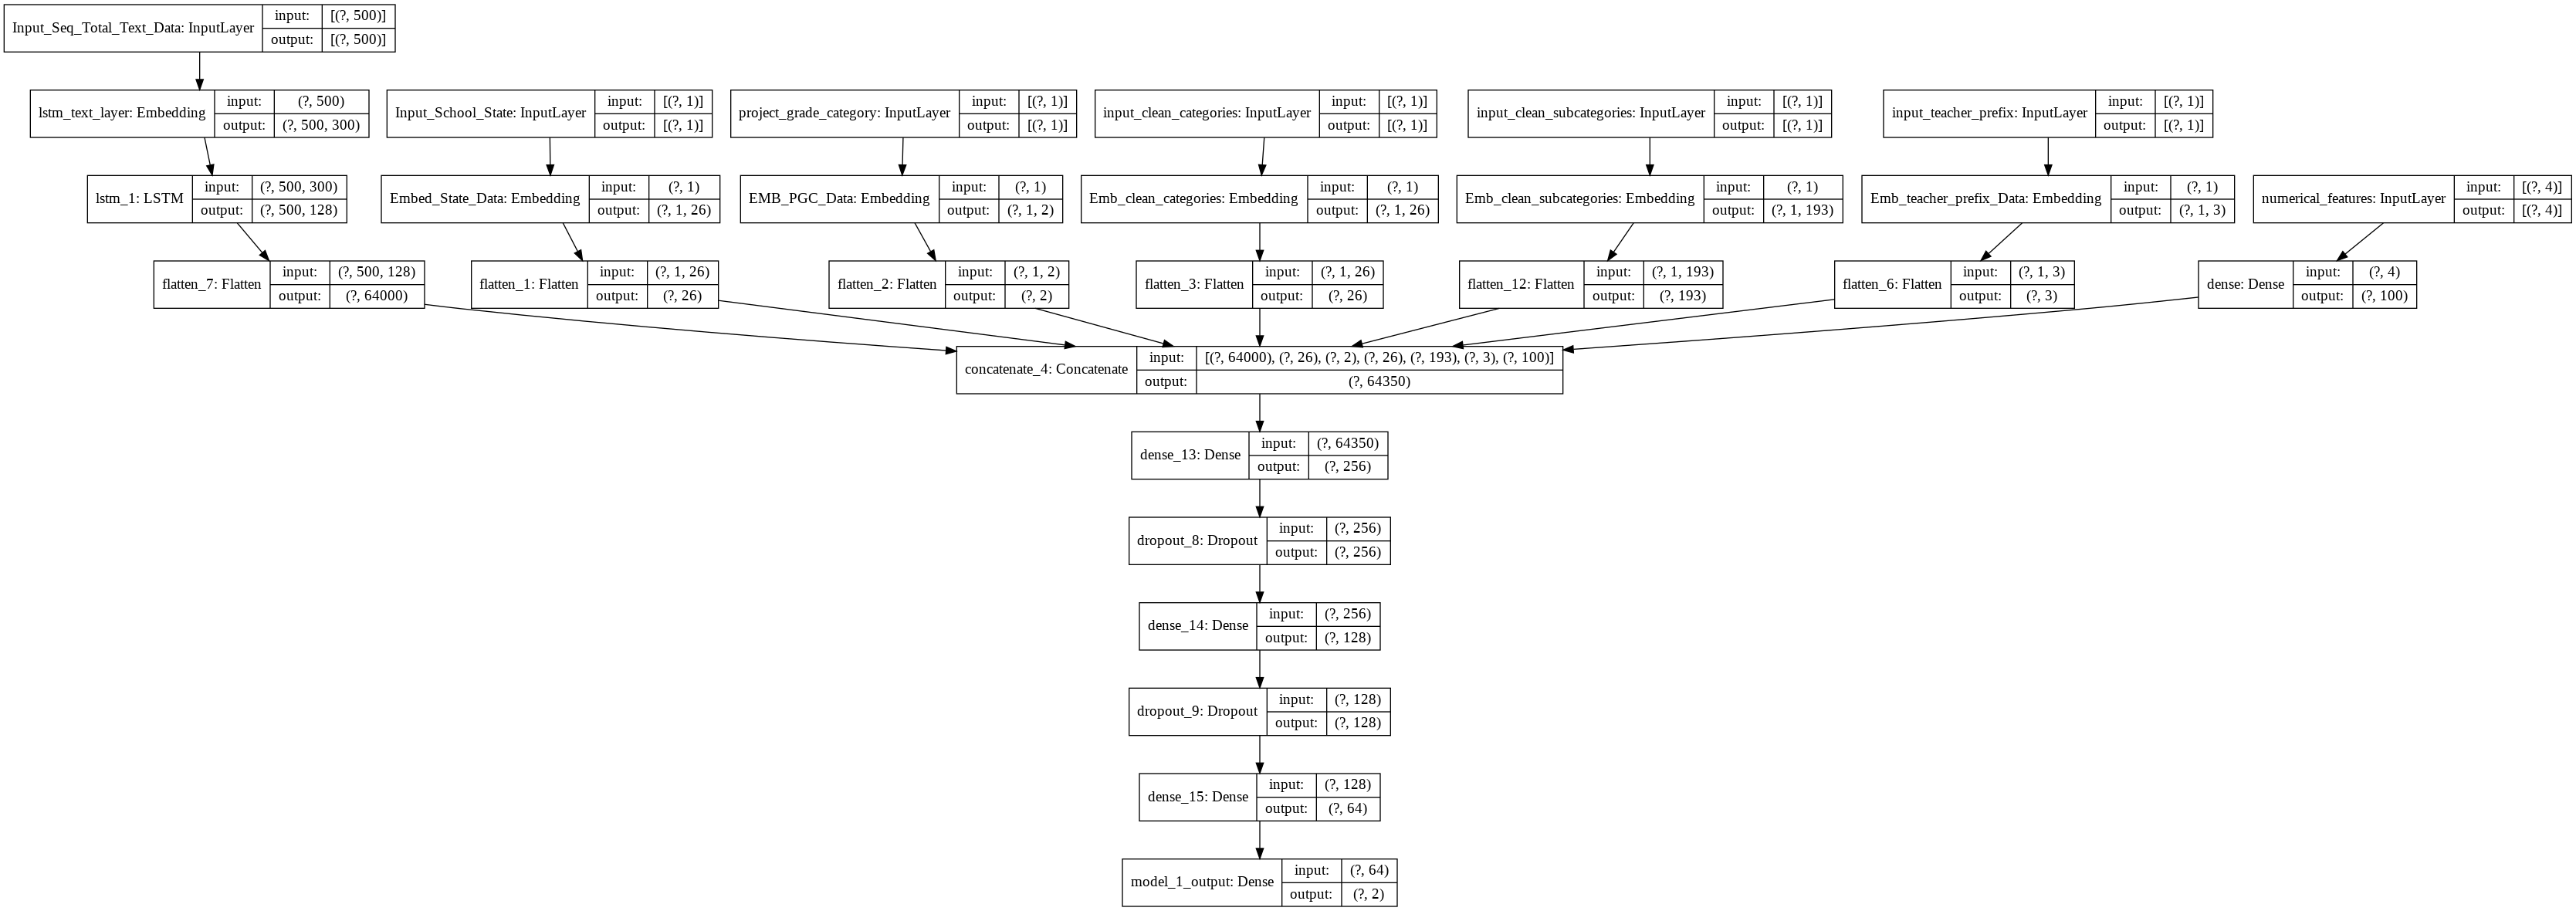

In [ ]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_1, show_shapes = True, show_layer_names = True, to_file = 'model_1.png')

Image(retina = True, filename = 'model_1.png')

In [59]:
#####https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

from sklearn.metrics import roc_auc_score

import tensorflow as tf

def auroc(y_true, y_pred):
  try:
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    pass

In [58]:
#####https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

aucCal = roc_callback(training_data=(X_Train_1, Y_Train_1),validation_data=(X_Cv_1, Y_Cv_1))

In [ ]:
##### https://keras.io/callbacks/

import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_1 = ModelCheckpoint("/content/drive/My Drive/Donor Choose/model_1.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_1 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_1 = TensorBoard(log_dir = "/content/drive/My Drive/Donor Choose/graph_1",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_1 = [checkpoint_1, earlystop_1, tensorboard_1,aucCal]

In [ ]:
from keras.optimizers import Adam, RMSprop

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [auroc])

In [ ]:
history_1 = model_1.fit(X_Train_1, Y_Train_1, batch_size = 512, epochs = 30, validation_data = (X_Cv_1, Y_Cv_1), verbose = 1, callbacks = callback_1)

Epoch 1/30
128/129 [============================>.] - ETA: 0s - loss: 0.3961 - auroc: 0.7729
Epoch 00001: val_loss did not improve from 0.40143
roc-auc_train: 0.7902 - roc-auc_val: 0.7571                                                                                                    
129/129 [==============================] - 68s 525ms/step - loss: 0.3961 - auroc: 0.7744 - val_loss: 0.4361 - val_auroc: 0.7579
Epoch 2/30
128/129 [============================>.] - ETA: 0s - loss: 0.4062 - auroc: 0.7761
Epoch 00002: val_loss improved from 0.40143 to 0.39790, saving model to /content/drive/My Drive/Donor Choose/model_1.h5
roc-auc_train: 0.7971 - roc-auc_val: 0.7668                                                                                                    
129/129 [==============================] - 71s 549ms/step - loss: 0.4062 - auroc: 0.7751 - val_loss: 0.3979 - val_auroc: 0.7680
Epoch 3/30
128/129 [============================>.] - ETA: 0s - loss: 0.3957 - auroc: 0.7788
Epoch 

In [ ]:
# Evaluating test data
score_1 = model_1.evaluate(X_Test_1, Y_Test_1, verbose = 1, batch_size = 512)
print(score_1)
print(history_1.history.keys())

43/43 [==============================] - 5s 113ms/step - loss: 0.3970 - auroc: 0.7615
[0.3969593048095703, 0.7614637017250061]
dict_keys(['loss', 'auroc', 'val_loss', 'val_auroc'])


In [ ]:
print('Test Loss : ', score_1[0])
print('Test AUC : ', score_1[1])

Test Loss :  0.3969593048095703
Test AUC :  0.7614637017250061


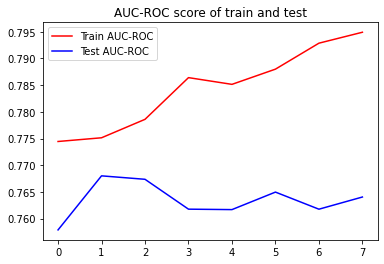

In [ ]:
import matplotlib.pyplot as plt
# Plotting train and test auc roc score
plt.plot(history_1.history['auroc'], 'r')
plt.plot(history_1.history['val_auroc'], 'b')
plt.title("AUC-ROC score of train and test")
plt.legend({'Train AUC-ROC': 'r', 'Test AUC-ROC':'b'})
plt.show()

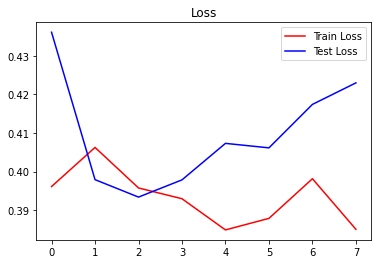

In [ ]:
import matplotlib.pyplot as plt
# Plotting train and test auc roc score
plt.plot(history_1.history['loss'], 'r')
plt.plot(history_1.history['val_loss'], 'b')
plt.title("Loss")
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

### MODEL 2

In [5]:

X = project_data_1.drop(['project_is_approved','Unnamed: 0'],axis = 1)
Y = project_data_1['project_is_approved']

In [6]:
from sklearn.model_selection import train_test_split

X_Tr,X_Test,Y_Tr,Y_Test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify = Y)
X_Train,X_Cv,Y_Train,Y_Cv = train_test_split(X_Tr,Y_Tr, test_size = 0.25, random_state = 42, stratify = Y_Tr)

In [7]:
print('Shape of Train Data : ', X_Train.shape)
print('Shape of CV Data : ',X_Cv.shape)
print('Shape of Test Data : ',X_Test.shape)
print('*'*20)
print('Y_Train : ' ,Y_Train.shape)
print('Y_Cv : ' ,Y_Cv.shape)
print('Y_Test : ',Y_Test.shape)

Shape of Train Data :  (65548, 10)
Shape of CV Data :  (21850, 10)
Shape of Test Data :  (21850, 10)
********************
Y_Train :  (65548,)
Y_Cv :  (21850,)
Y_Test :  (21850,)


##### VECTORIZATION OF THE TEXT DATA :

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()#min_df=5

# Fit and transform train data
X_Train_vec = tf.fit_transform(X_Train.essay)

# Transform cv data
X_Cv_vec = tf.transform(X_Cv.essay)

# Transform test data
X_Test_vec = tf.transform(X_Test.essay)

In [137]:
print('Some of the feature names : ', tf.get_feature_names()[10:])

Some of the feature names :  ['01g', '01ip', '02', '021', '022x10', '024', '025', '02810010', '03', '030', '034', '04', '041', '047', '05', '050', '059', '05a', '05pm', '06', '060', '07', '074', '08', '09', '0mp', '0my', '0thanks', '0the', '0ver', '10', '100', '1000', '1000blackgirlbooks', '10027', '100ft', '100m', '100s', '100th', '101', '1017', '102', '1020', '103', '104', '1043', '105', '1057', '106', '1065', '107', '1070', '108', '1084', '109', '1099', '10am', '10cm', '10k', '10min', '10pk', '10s', '10th', '10x', '10x10', '10yrs', '11', '110', '1100', '110mph', '111', '111558', '112', '1120', '112th', '113', '113th', '114', '115', '1150', '116', '117', '1170l', '119', '11am', '11th', '11x14', '11x17', '12', '120', '1200', '12000', '120s', '121', '1212', '123', '1233', '123s', '124', '1248', '125', '1250', '126', '127', '128', '128oz', '129', '12gb', '12pm', '12th', '12x18', '13', '130', '1300', '130ish', '131', '131210', '1318110', '132', '133', '134', '134th', '135', '1350', '1358

In [138]:
print('First 10 idf values : ', tf.idf_[:10])

First 10 idf values :  [ 7.21535591  5.90846833 11.39740605 11.39740605 11.39740605 10.14464308
 11.39740605  9.60564658 10.70425887 11.39740605]


In [139]:
feature_idf_dic = sorted(zip(tf.idf_,tf.get_feature_names()))
print(feature_idf_dic)

[(1.000122053551147, 'to'), (1.000518830506664, 'and'), (1.0024744926171874, 'the'), (1.0076110044970108, 'students'), (1.010983221574213, 'of'), (1.0130212972252586, 'in'), (1.0341861910681696, 'are'), (1.0846771978133452, 'my'), (1.0893704794035954, 'they'), (1.0949746093313772, 'their'), (1.098638417399477, 'for'), (1.1212348818654914, 'is'), (1.1247543720674433, 'with'), (1.126588028822569, 'have'), (1.1273501579710583, 'will'), (1.1391328400833514, 'that'), (1.163302664831072, 'school'), (1.1850377168565016, 'be'), (1.2447369005862934, 'nannan'), (1.2523850840234754, 'our'), (1.2601911555954213, 'them'), (1.295354568109457, 'on'), (1.364228852886326, 'learning'), (1.364404541917194, 'we'), (1.3707941992271406, 'this'), (1.387938176912044, 'as'), (1.3943220652308137, 'classroom'), (1.456478217475431, 'can'), (1.462444058489532, 'learn'), (1.4645538918193721, 'from'), (1.5052322603495494, 'it'), (1.5156529925952822, 'at'), (1.521289697245408, 'help'), (1.5266224936224035, 'these'), 

In [140]:
print('First 5 features with small idf values : ')
print(feature_idf_dic[:5])

First 5 features with small idf values : 
[(1.000122053551147, 'to'), (1.000518830506664, 'and'), (1.0024744926171874, 'the'), (1.0076110044970108, 'students'), (1.010983221574213, 'of')]


In [141]:
print('Last 5 features with high idf values : ')
print(feature_idf_dic[-5:])

Last 5 features with high idf values : 
[(11.397406052985405, 'zydeco'), (11.397406052985405, 'zynergy'), (11.397406052985405, 'ŵithout'), (11.397406052985405, 'ʺautism'), (11.397406052985405, 'ﬁtness')]


Box Plot of IDF Values : 


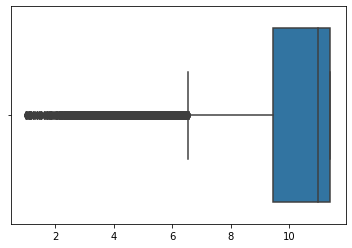

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

print('Box Plot of IDF Values : ')
sns.boxplot(tf.idf_)
plt.show()

Violin Plot of IDF Values :


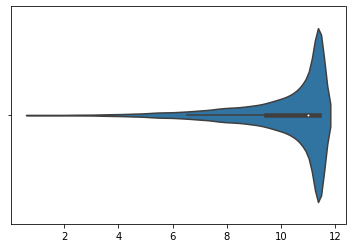

In [143]:
print('Violin Plot of IDF Values :')
sns.violinplot(tf.idf_)
plt.show()

In [144]:
idfVal_sort = sorted(tf.idf_)

print('First Quantile  (Q1)  : ', np.percentile(idfVal_sort,25))
print('Second Quantile (Q2)  : ', np.percentile(idfVal_sort,50))
print('Third Quantile  (Q3)  : ', np.percentile(idfVal_sort,75))
print('Fourth Quantile (Q4)  : ', np.percentile(idfVal_sort,100))
print('\n')
print('Inter Quartile Range (IQR) : ',np.percentile(idfVal_sort,75) - np.percentile(idfVal_sort,25))
print('\n')
print('*'*40)
print('Min Value of IDF    : ', np.min(idfVal_sort))
print('Mean value of IDF   : ', np.mean(idfVal_sort))
print('Median value of IDF : ', np.median(idfVal_sort))
print('Max Value of IDF    : ', np.max(idfVal_sort))


First Quantile  (Q1)  :  9.451495903930091
Second Quantile (Q2)  :  10.99194094487724
Third Quantile  (Q3)  :  11.397406052985405
Fourth Quantile (Q4)  :  11.397406052985405


Inter Quartile Range (IQR) :  1.9459101490553135


****************************************
Min Value of IDF    :  1.000122053551147
Mean value of IDF   :  10.092809498606849
Median value of IDF :  10.99194094487724
Max Value of IDF    :  11.397406052985405


In [71]:
feature_idf_dic[0][1]

'to'

In [145]:
word_list = []

for i in range(len(feature_idf_dic)):
  if feature_idf_dic[i][0] > 2 and feature_idf_dic[i][0] < 11:
    word = feature_idf_dic[i][1]
    word_list.append(word)

In [146]:
print('Total Unique Feature Names : ', len(feature_idf_dic))
print('Features within IQR : ', len(word_list))

Total Unique Feature Names :  49425
Features within IQR :  29808


In [147]:
print(word_list)

['about', 'year', 'when', 'new', 'who', 'one', 'time', 'student', 'would', 'want', 'skills', 'reading', 'nmy', 'grade', 'very', 'get', 'through', 'every', 'allow', 'provide', 'am', 'what', 'teach', 'free', 'other', 'where', 'some', 'while', 'up', 'most', 'high', 'how', 'project', 'like', 'me', 'into', 'has', 'different', 'way', 'technology', 'best', 'world', 'materials', 'learners', 'out', 'lunch', 'which', 'group', 'well', 'having', 'children', 'only', 'give', 'create', 'education', 'you', 'needs', 'home', 'life', 'teacher', 'because', 'math', 'read', 'opportunity', 'hard', 'being', 'working', 'using', 'low', 'community', 'books', 'own', 'eager', 'during', 'first', 'just', 'excited', 'activities', 'take', 'fun', 'see', 'title', 'small', 'access', 'great', 'environment', 'ni', 'language', 'diverse', 'much', 'kids', 'nthe', 'hands', 'become', 'used', 'experience', 'know', 'daily', 'level', 'us', 'better', 'there', 'around', 'even', 'resources', 'nnannan', 'things', 'income', 'poverty', 

In [148]:
##REF : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# Prepare tokenizer
t = Tokenizer(num_words = vocab_size)
t.fit_on_texts(word_list)

# integer encode the documents
X_Train_encoded = t.texts_to_sequences(X_Train['essay'])
X_Cv_encoded = t.texts_to_sequences(X_Cv['essay'])
X_Test_encoded = t.texts_to_sequences(X_Test['essay'])

In [149]:
# pad documents to a max length of 4 words
max_length = seq_len
X_Train_encoded_padded = pad_sequences(X_Train_encoded, maxlen=max_length, padding='post',truncating = 'post')
X_Cv_encoded_padded = pad_sequences(X_Cv_encoded, maxlen=max_length, padding='post', truncating = 'post')
X_Test_encoded_padded = pad_sequences(X_Test_encoded, maxlen=max_length, padding='post', truncating = 'post')
print('X_Train Encoded Padded : ',X_Train_encoded_padded.shape)
print('X_Cv Encoded Padded : ',X_Cv_encoded_padded.shape)
print('X_Test Encoded Padded : ',X_Test_encoded_padded.shape)

X_Train Encoded Padded :  (65548, 500)
X_Cv Encoded Padded :  (21850, 500)
X_Test Encoded Padded :  (21850, 500)


In [150]:
# create a weight matrix for words in training docs

word_count_m2 = min(vocab_size, len(t.word_index) + 1)
embed_matrix_m2 = zeros((word_count_m2, emb_dim))
for word, i in t.word_index.items():
	embed_vector = glove_vector.get(word)
	if embed_vector is not None:
		embed_matrix_m2[i] = embed_vector

In [151]:
print("Total Words in Train Data :", len(t.word_index) + 1)
print("Embedding Matrix Shape :", embed_matrix_m2.shape)

Total Words in Train Data : 29804
Embedding Matrix Shape : (29804, 300)


In [152]:
input_size = len(t.word_index) + 1

# Creating an input layer
input_layer_text_M2 = Input(shape = (seq_len, ), name = "Input_Seq_Total_Text_M2_Data")

# Creating an embedding layer
emb_layer_text_M2 = Embedding(input_dim = input_size, output_dim = emb_dim,
                         input_length = seq_len, weights = [embed_matrix_m2],
                         trainable = False, name = "LSTM_text_layer_M2")(input_layer_text_M2)

# Creating LSTM layer
emb_layer_lstm_M2 = LSTM(128, return_sequences = True, dropout = 0.3)(emb_layer_text_M2)

flatten_1_M2 = Flatten()(emb_layer_lstm_M2)

##### CONCATENATING ALL THE LAYERS :

In [153]:
from keras.layers import concatenate
    
concat_layer_M2 = concatenate([flatten_1_M2, flatten_schoolState, flatten_projectGrade, flatten_cleanCat, flatten_cleanSubCat, flatten_teacherPrefix, embed_numericalFeatures])

##### BUILDING ARCHITECTURE FOR MODEL 2 :

In [155]:
from keras.models import Model
from keras import regularizers, initializers

# Layer 1
m2 = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(concat_layer_M2)
m2 = Dropout(0.3)(m2)

# Layer 2
m2 = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m2)
m2 = Dropout(0.3)(m2)

# Layer 3
m2 = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m2)
m2 = Dropout(0.3)(m2)

# Layer 4
m2 = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m2)
m2 = Dropout(0.3)(m2)

# Output layer
output = Dense(2, activation = 'softmax', name= 'model_2_output')(m2)

# Model
model_2 = Model(inputs = [input_layer_text_M2, input_schoolState, input_projectGrade, input_cleanCat,
                        input_cleanSubCat, input_teacherPrefix, input_numericalFeatures], outputs = [output])

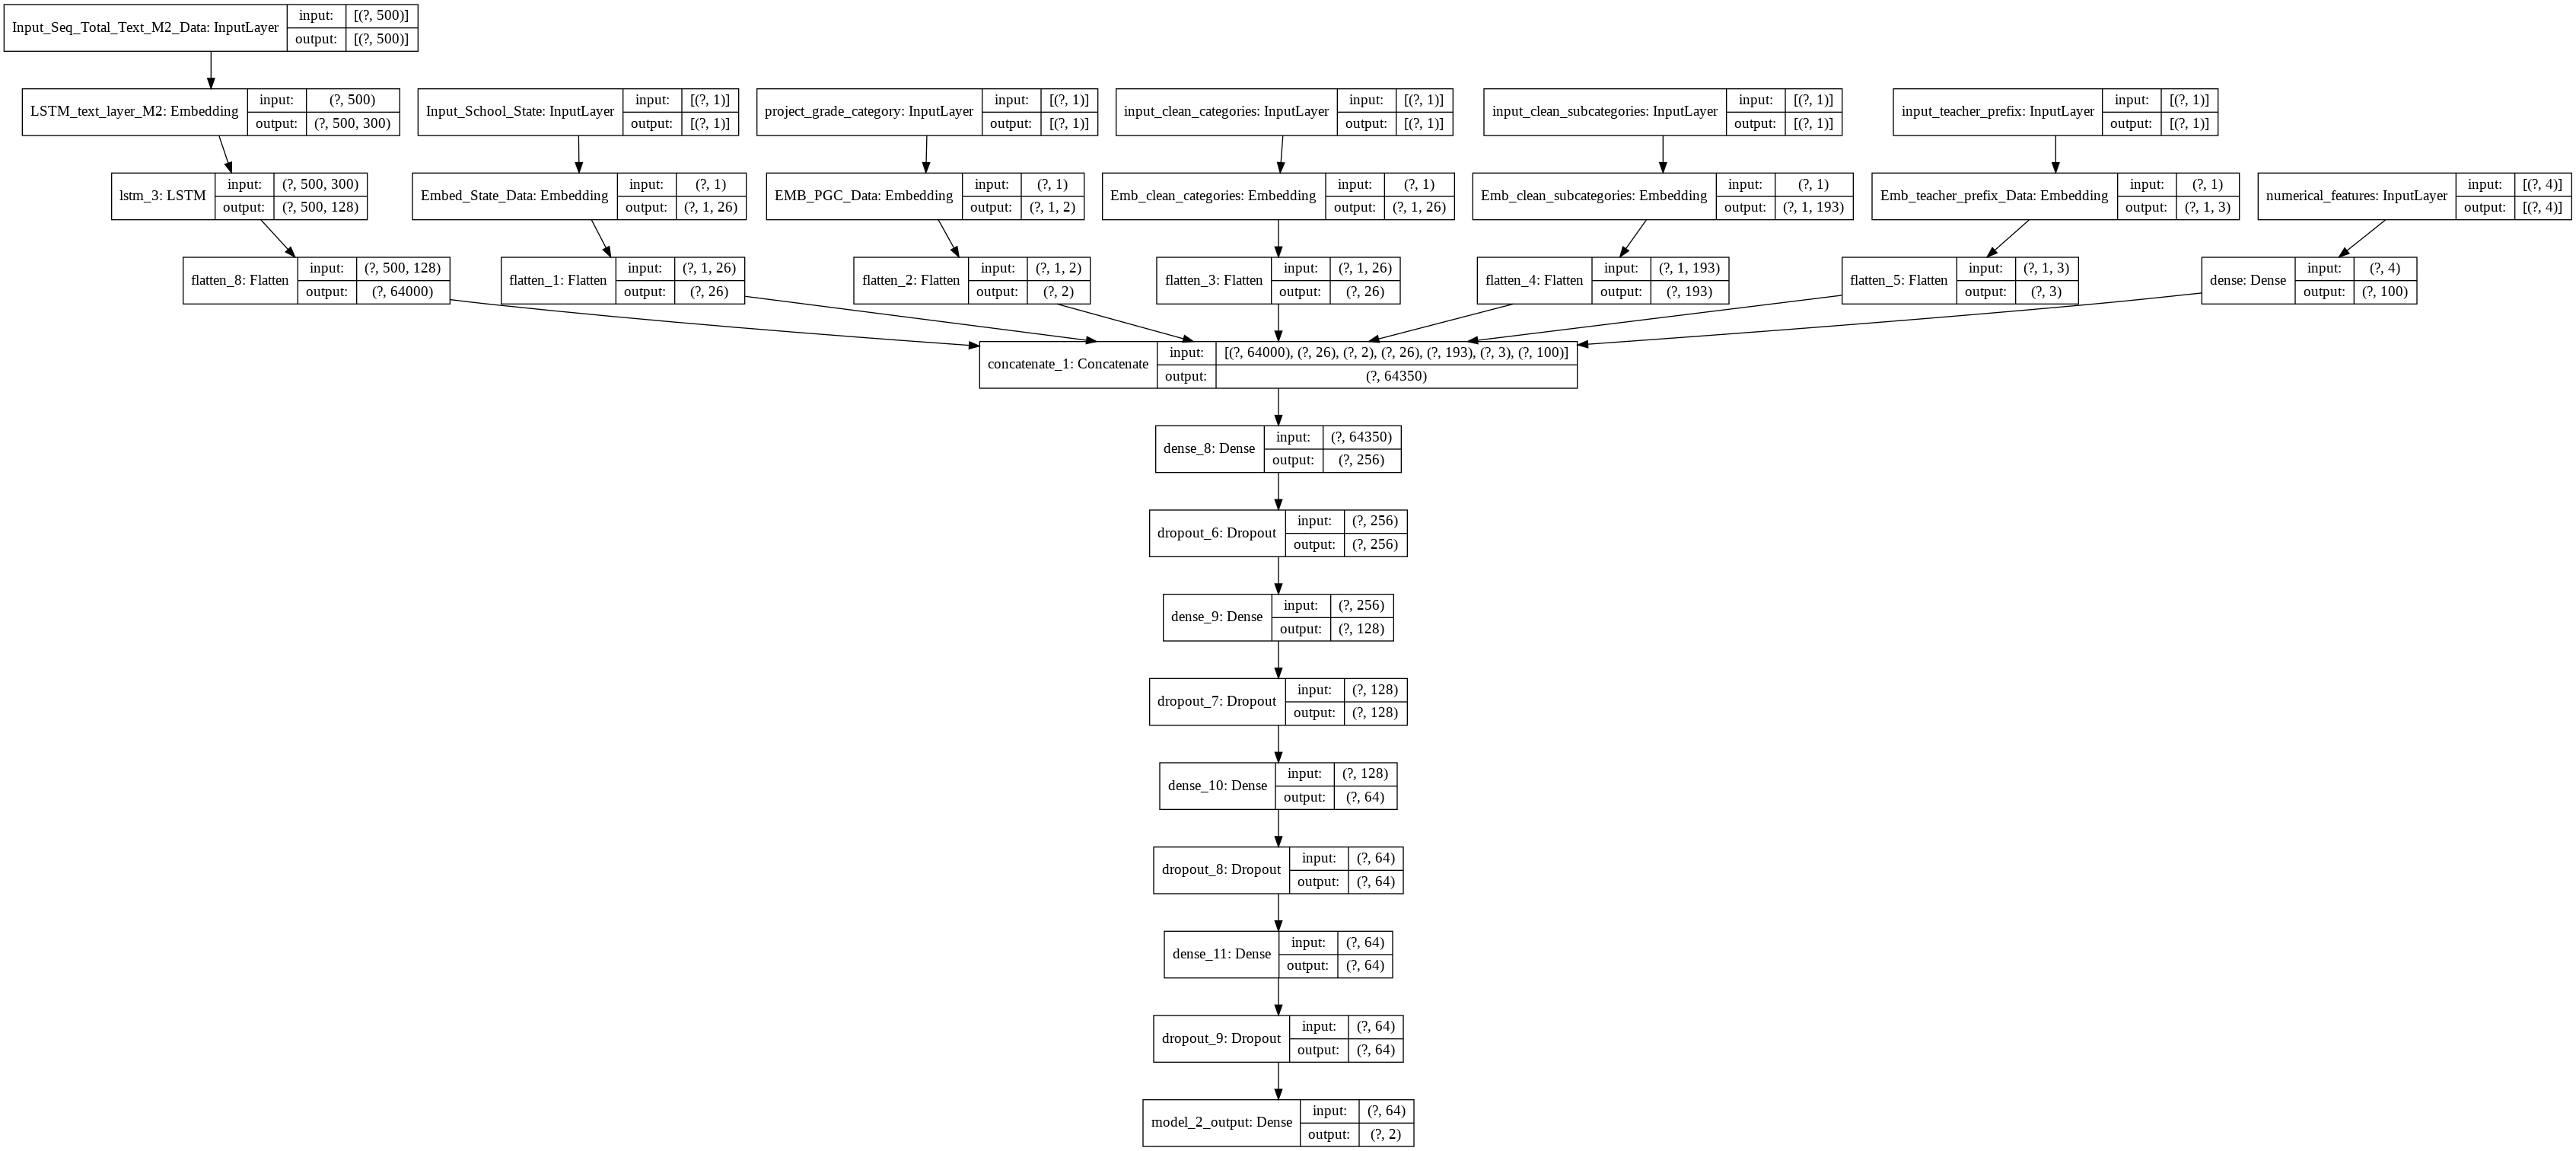

In [156]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_2, show_shapes = True, show_layer_names = True, to_file = '/content/drive/My Drive/Donor Choose/model_2.png')

Image(retina = True, filename = '/content/drive/My Drive/Donor Choose/model_2.png')

##### FINAL DATASETS :

In [157]:
# Train data
X_Train_2 = [X_Train_encoded_padded, X_Train_schoolState_encoded, X_Train_projectGrade_encoded, X_Train_cleanCat_encoded, X_Train_cleanSubCat_encoded, 
             X_Train_teacherPrefix_encoded, train_std]

# CV data
X_Cv_2 = [X_Cv_encoded_padded, X_Cv_schoolState_encoded, X_Cv_projectGrade_encoded, 
          X_Cv_cleanCat_encoded, X_Cv_cleanSubCat_encoded, X_Cv_teacherPrefix_encoded, cv_std]

# Test data
X_Test_2 = [X_Test_encoded_padded, X_Test_schoolState_encoded, X_Test_projectGrade_encode, X_Test_cleanCat_encoded, X_Test_cleanSubCat_encoded, 
            X_Test_teacherPrefix_encoded, test_std]

In [125]:
from keras.utils import np_utils

Y_Train_2 = np_utils.to_categorical(Y_Train, 2) 
Y_Cv_2 = np_utils.to_categorical(Y_Cv, 2)
Y_Test_2 = np_utils.to_categorical(Y_Test, 2)

In [159]:
#####https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

from sklearn.metrics import roc_auc_score

import tensorflow as tf

def auroc(y_true, y_pred):
  try:
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    return 0.5

In [185]:
import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_2 = ModelCheckpoint("/content/drive/My Drive/Donor Choose/model_2.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_2 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 3,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_2 = TensorBoard(log_dir = "/content/drive/My Drive/Donor Choose/graph_2",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_2 = [checkpoint_2, earlystop_2, tensorboard_2]#,aucCal

In [125]:
from keras.optimizers import Adam, RMSprop

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [auroc])

In [178]:
history_2 = model_2.fit(X_Train_2, Y_Train_2, batch_size = 1024, epochs = 30, validation_data = (X_Cv_2, Y_Cv_2), verbose = 1, callbacks = callback_2)

Epoch 1/30
65/65 [==============================] - ETA: 0s - loss: 0.3919 - auroc: 0.7483
Epoch 00001: val_loss improved from inf to 0.39205, saving model to /content/drive/My Drive/Donor Choose/model_2.h5
65/65 [==============================] - 78s 1s/step - loss: 0.3919 - auroc: 0.7483 - val_loss: 0.3921 - val_auroc: 0.7519
Epoch 2/30
65/65 [==============================] - ETA: 0s - loss: 0.3928 - auroc: 0.7513
Epoch 00002: val_loss did not improve from 0.39205
65/65 [==============================] - 76s 1s/step - loss: 0.3928 - auroc: 0.7513 - val_loss: 0.4257 - val_auroc: 0.7278
Epoch 3/30
65/65 [==============================] - ETA: 0s - loss: 0.4048 - auroc: 0.7591
Epoch 00003: val_loss did not improve from 0.39205
Restoring model weights from the end of the best epoch.
65/65 [==============================] - 76s 1s/step - loss: 0.4048 - auroc: 0.7591 - val_loss: 0.4011 - val_auroc: 0.7529
Epoch 00003: early stopping


In [121]:
!pip3 install deepctr

     |████████████████████████████████| 122kB 4.6MB/s 


In [172]:
from tensorflow.keras.models import load_model

from deepctr.layers import custom_objects
custom_objects["auroc"] = auroc
model_2 = load_model('/content/drive/My Drive/Donor Choose/model_2.h5', custom_objects=custom_objects)

In [181]:
# Evaluating test data
score_2 = model_2.evaluate(X_Test_2, Y_Test_2, verbose = 1, batch_size = 1024)
print(score_2)
print(history_2.history.keys())

22/22 [==============================] - 10s 433ms/step - loss: 0.3940 - auroc: 0.7472
[0.3940233886241913, 0.7471500039100647]
dict_keys(['loss', 'auroc', 'val_loss', 'val_auroc'])


In [182]:
print('Test Loss : ', score_2[0])
print('Test AUC : ', score_2[1])

Test Loss :  0.3940233886241913
Test AUC :  0.7471500039100647


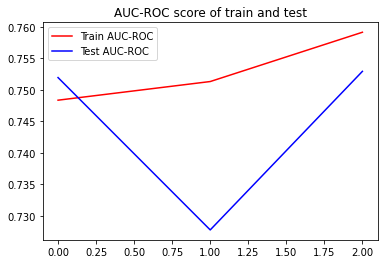

In [180]:
import matplotlib.pyplot as plt
# Plotting train and test auc roc score
plt.plot(history_2.history['auroc'], 'r')
plt.plot(history_2.history['val_auroc'], 'b')
plt.title("AUC-ROC score of train and test")
plt.legend({'Train AUC-ROC': 'r', 'Test AUC-ROC':'b'})
plt.show()

### MODEL 3 :

In [ ]:
X = project_data_1.drop(['project_is_approved','Unnamed: 0'],axis = 1)
Y = project_data_1['project_is_approved']

In [32]:
# Train
df_m3_train = pd.DataFrame()

df_m3_train['school_state'] = X_Train_schoolState_encoded
df_m3_train['project_grade'] = X_Train_projectGrade_encoded
df_m3_train['clean_categories'] = X_Train_cleanCat_encoded
df_m3_train['clean_subCategories'] = X_Train_cleanSubCat_encoded
df_m3_train['teacher_prefix'] = X_Train_teacherPrefix_encoded
df_m3_train['price'] = tr_1
df_m3_train['quantity'] = tr_2
df_m3_train['IsNumerical'] = tr_3
df_m3_train['teacher_number'] = tr_4
   
# CV
df_m3_cv = pd.DataFrame()

df_m3_cv['school_state'] = X_Cv_schoolState_encoded
df_m3_cv['project_grade'] = X_Cv_projectGrade_encoded
df_m3_cv['clean_categories'] = X_Cv_cleanCat_encoded
df_m3_cv['clean_subCategories'] = X_Cv_cleanSubCat_encoded
df_m3_cv['teacher_prefix'] = X_Cv_teacherPrefix_encoded
df_m3_cv['price'] = cv_1
df_m3_cv['quantity'] = cv_2
df_m3_cv['IsNumerical'] = cv_3
df_m3_cv['teacher_number'] = cv_4

# Test
df_m3_test = pd.DataFrame()

df_m3_test['school_state'] = X_Test_schoolState_encoded
df_m3_test['project_grade'] = X_Test_projectGrade_encode
df_m3_test['clean_categories'] = X_Test_cleanCat_encoded
df_m3_test['clean_subCategories'] = X_Test_cleanSubCat_encoded
df_m3_test['teacher_prefix'] = X_Test_teacherPrefix_encoded
df_m3_test['price'] = test_1
df_m3_test['quantity'] = test_2
df_m3_test['IsNumerical'] = test_3
df_m3_test['teacher_number'] = test_4

In [33]:
# Train data
print('Train Data for Categorical and Numerical Features : ', df_m3_train.shape)

# CV data
print('CV Data for Categorical and Numerical Features : ', df_m3_cv.shape)

# Test data
print('Test Data for Categorical and Numerical Features : ', df_m3_test.shape)

Train Data for Categorical and Numerical Features :  (65548, 9)
CV Data for Categorical and Numerical Features :  (21850, 9)
Test Data for Categorical and Numerical Features :  (21850, 9)


##### FINAL DATASET FOR MODEL 3 :

In [43]:
X_Train_3 = [X_Train_encoded_padded, df_m3_train]
X_Cv_3 = [X_Cv_encoded_padded, df_m3_cv]
X_Test_3 = [X_Test_encoded_padded, df_m3_test]

In [37]:
from keras.utils import np_utils

Y_Train_3 = np_utils.to_categorical(Y_Train, 2) 
Y_Cv_3 = np_utils.to_categorical(Y_Cv, 2)
Y_Test_3 = np_utils.to_categorical(Y_Test, 2)

##### CNN ARCHITECTURE FOR MODEL 3 :

In [46]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Activation

# Input layer
input_layer_1 = Input(shape = (9,1), name = "Conv1")

# Block 1
cnn1 = Conv1D(64, kernel_size = 3, activation = 'relu', name = 'conv1D_block_1')(input_layer_1)

# Block 2
cnn2 = Conv1D(64, 3, activation='relu', padding = 'same', name = 'conv1D_block_2')(cnn1)

# Block 3
cnn3 = Conv1D(32, 3, activation='softmax', padding = 'same',  name = 'conv1D_block_3')(cnn2)

# Block 4
cnn4 = Conv1D(32, 3, activation='softmax', padding = 'same',  name = 'conv1D_block_4')(cnn3)

# Flattening
flatten_cnn_m3 = Flatten()(cnn4)

##### CONCATENATING ALL THE ABOVE LAYERS : 

In [48]:
from keras.layers import concatenate
    
concat_layer_m3 = concatenate([flatten_1, flatten_cnn_m3])

##### BUILDING ARCHITECTURE FOR MODEL 3 :

In [53]:
from keras.models import Model
from keras import regularizers, initializers

# Layer 1
m_3 = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(concat_layer_m3)
m_3 = Dropout(0.3)(m_3)

# Layer 2
m_3 = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

# Layer 3
m_3 = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_3)
#m_3 = Dropout(0.3)(m_3)

# Layer 4
#m_3 = Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_3)
#m_3 = Dropout(0.3)(m_3)

# Output layer
output_3 = Dense(2, activation = 'softmax', name= 'model_3_output')(m_3)

# Model
model_3 = Model(inputs = [input_layer_text, input_layer_1], outputs = output_3)

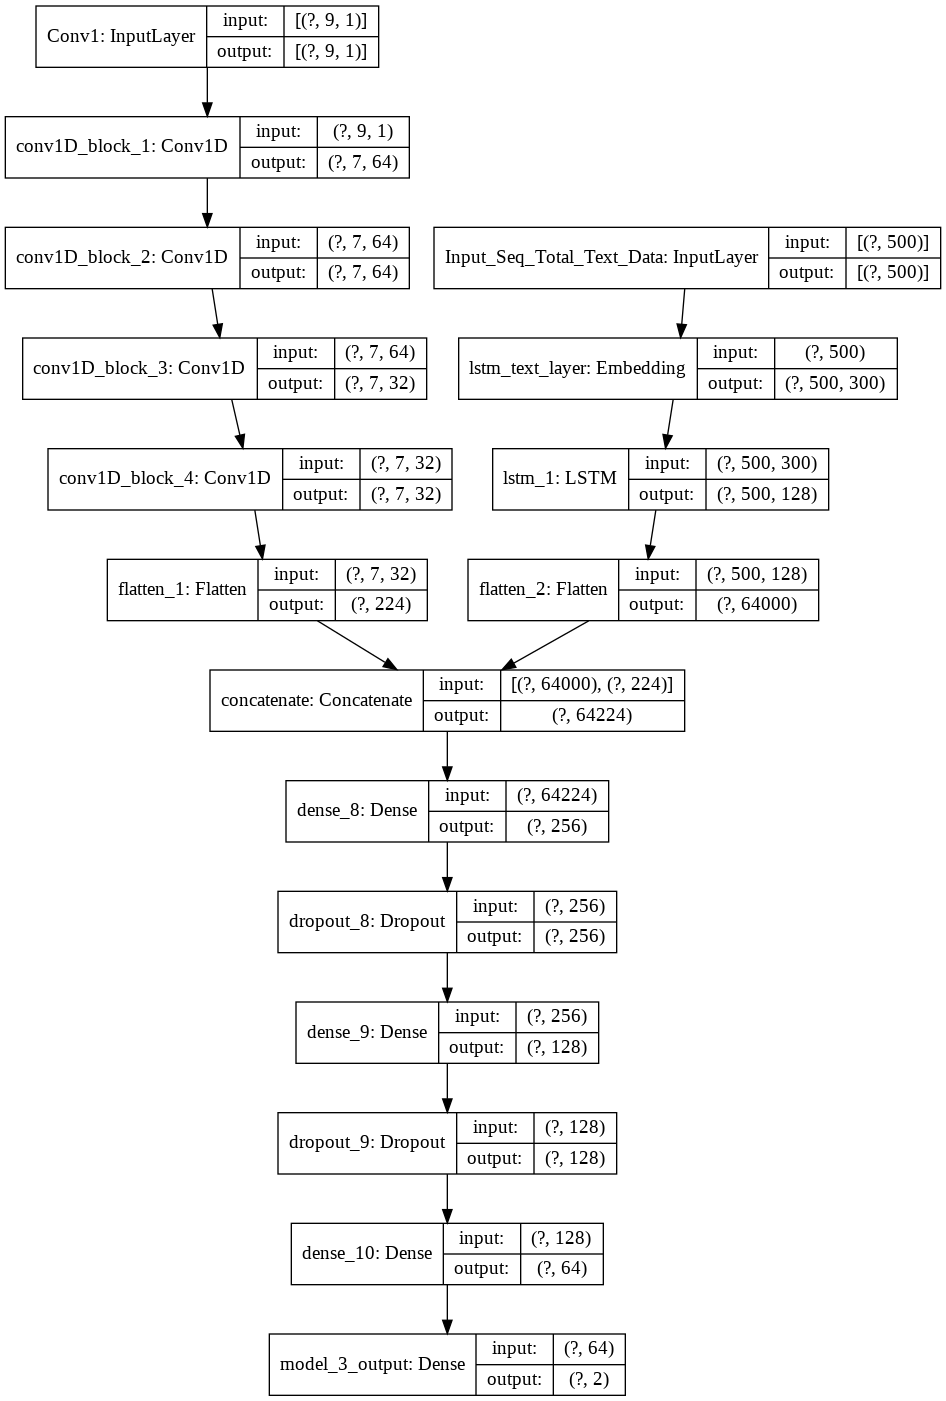

In [54]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_3, show_shapes = True, show_layer_names = True, to_file = '/content/drive/My Drive/Donor Choose/model_3.png')

Image(retina = True, filename = '/content/drive/My Drive/Donor Choose/model_3.png')

In [93]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        

    def on_train_begin(self, logs={}):
		    self.aucs = []
		    self.train_aucs = []

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        self.train_aucs.append(roc_auc_score(self.y, y_pred_train))
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        self.aucs.append(roc_auc_score(self.y_val, y_pred_val))
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

aucCal = roc_callback(training_data=(X_Train_3, Y_Train_3),validation_data=(X_Cv_3, Y_Cv_3))

In [95]:
import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_3 = ModelCheckpoint("/content/drive/My Drive/Donor Choose/model_3.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

earlystop_3 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

tensorboard_3 = TensorBoard(log_dir = "/content/drive/My Drive/Donor Choose/graph_3",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_3 = [checkpoint_3, earlystop_3, tensorboard_3,aucCal]

In [94]:
from keras.optimizers import Adam

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

In [96]:
history_3 = model_3.fit(X_Train_3, Y_Train_3, batch_size = 1024, epochs = 30, validation_data = (X_Cv_3, Y_Cv_3), verbose = 1, callbacks = callback_3)

Epoch 1/30
64/65 [============================>.] - ETA: 0s - loss: 0.3767
Epoch 00001: val_loss improved from inf to 0.40350, saving model to /content/drive/My Drive/Donor Choose/model_3.h5
roc-auc_train: 0.805 - roc-auc_val: 0.7492                                                                                                    
65/65 [==============================] - 82s 1s/step - loss: 0.3767 - val_loss: 0.4035
Epoch 2/30
64/65 [============================>.] - ETA: 0s - loss: 0.3950
Epoch 00002: val_loss did not improve from 0.40350
roc-auc_train: 0.8079 - roc-auc_val: 0.7552                                                                                                    
65/65 [==============================] - 76s 1s/step - loss: 0.3950 - val_loss: 0.4107
Epoch 3/30
64/65 [============================>.] - ETA: 0s - loss: 0.3828
Epoch 00003: val_loss did not improve from 0.40350
roc-auc_train: 0.812 - roc-auc_val: 0.7593                                                      

In [103]:
print('Test AUC : ',max(aucCal.aucs))
print("Train AUC : ", max(aucCal.train_aucs))

Test AUC :  0.7593747867332938
Train AUC :  0.8185347792314136


In [98]:
score_3 = model_3.evaluate(X_Test_3, Y_Test_3, verbose = 1, batch_size = 1024)
print('Test Loss : ',score_3)
print(history_3.history.keys())

22/22 [==============================] - 5s 205ms/step - loss: 0.4036
Test Loss :  0.4035550355911255
dict_keys(['loss', 'val_loss'])


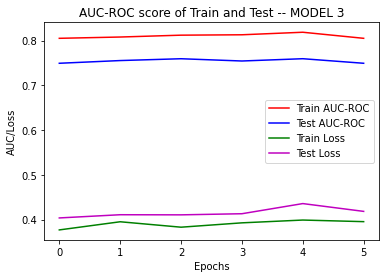

In [120]:
import matplotlib.pyplot as plt
# Plotting train and test auc roc score
plt.plot(aucCal.train_aucs, 'r')
plt.plot(aucCal.aucs, 'b')
plt.plot(history_3.history['loss'], 'g')
plt.plot(history_3.history['val_loss'], 'm')
plt.xlabel('Epochs')
plt.ylabel('AUC/Loss')
plt.title("AUC-ROC score of Train and Test -- MODEL 3")
plt.legend({'Train AUC-ROC': 'r', 'Test AUC-ROC':'b','Train Loss': 'g', 'Test Loss':'m'})
plt.show()

### CONCLUSION :

In [130]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['Model', 'Optimizer', 'Dropout', 'Test Loss', 'Test AUC-ROC']

a.add_row(['Model- 1', 'Adam', 0.3, 0.39695, 0.7615])
a.add_row(['Model- 2', 'Adam', 0.3, 0.39402, 0.7472])
a.add_row(['Model- 3', 'Adam', 0.3, 0.40355, 0.7593])

print(a.get_string(title = "LSTM on Donors Result"))

+----------+-----------+---------+-----------+--------------+
|  Model   | Optimizer | Dropout | Test Loss | Test AUC-ROC |
+----------+-----------+---------+-----------+--------------+
| Model- 1 |    Adam   |   0.3   |  0.39695  |    0.7615    |
| Model- 2 |    Adam   |   0.3   |  0.39402  |    0.7472    |
| Model- 3 |    Adam   |   0.3   |  0.40355  |    0.7593    |
+----------+-----------+---------+-----------+--------------+


All the models performed nearly same though MODEL 1 has the best Test AUC of 0.76.

We tested AUC as a metric. We implemented this by building a custom function as well as a callback option. Sometimes custom function used to throw an exception in any random epoch and in that case the callback function is used. Both gave nearly the same value.

